# Projeto 01  | Ciência dos Dados | Engenharia 2B #
***Aluno:*** Cicero Tiago Carneiro Valentim
<p style="font-size:11px">As informações contidas neste documento estão sujeitas a <b>alterações</b> até a data de entrega definitiva. </p>

<h2 style="font-family: monospace">Introdução</h2>

Esse projeto visa avaliar dados com base na Organisation for Economic Co-operation and Development ***(OECD)***.
Serão cruzados dados para comparar o **consumo de calorias diárias por pessoa** com a **produção de CO²** antes e depois de determinados países fazerem parte da organização. Além disso, países que ainda não fazem parte nos períodos estudados terão seus índices avaliados. Por fim, será que <b style="color:blue">é correto dizer que países que entraram na OECD são beneficiados de forma expressiva se comparados a países que não entraram?</b>

<h2 style="font-family: monospace">Metodologia</h2>

Um dos objetivos da organização é promover padrões internacionais de comércio que favoreçam a melhoria na qualidade de  vida da população dos países envolvidos.
Primeiramente, será feita uma exploração nos dados (obtidos no site <a href="https://www.gapminder.org/data/">Gapminder</a>) para verificar a relação entre a <b>produçao de CO²</b> e o aumento (ou a diminuição) do <b>consumo de calorias por pessoa por dia</b>, uma vez que muitos serviços vinculados à indústria são responsáveis pela produção de CO² e alguns desses serviços estão diretamente relacionados com a produção de alimentos.

<h2 style="font-family: monospace">Códigos</h2>

**1)** Importando as bibliotecas necessárias e definindo funções:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import os

**2)** Definindo o caminho das tabelas

In [2]:
tabs = os.getcwd() + "/tabs/"

<b>3)</b>Conjunto de paises membros da OECD e suas respectivas datas de entrada:<br><i style="font-size:13px;">A lista de países pode ser acessada em: http://worldpopulationreview.com/countries/oecd-countries/<br>
Esse dicionário de países foi construído no arquivo secundário deste projeto.</i>

In [3]:
paises_oecd = {'Australia': [1971], 'Austria': [1961], 'Belgium': [1961], 'Canada': [1961], 'Chile': [2010], 'The Czech Republic': [1995], 'Denmark': [1961], 'Estonia': [2010], 'Finland': [1969], 'France': [1961], 'Germany': [1961], 'Greece': [1961], 'Hungary': [1996], 'Iceland': [1961], 'Ireland': [1961], 'Israel': [2010], 'Italy': [1962], 'Japan': [1974], 'Korea': [1996], 'Latvia': [2016], 'Lithuania': [2018], 'Luxembourg': [1961], 'Mexico': [1994], 'The Netherlands': [1961], 'New Zealand': [1973], 'Norway': [1961], 'Poland': [1996]}
print(paises_oecd)

{'Australia': [1971], 'Austria': [1961], 'Belgium': [1961], 'Canada': [1961], 'Chile': [2010], 'The Czech Republic': [1995], 'Denmark': [1961], 'Estonia': [2010], 'Finland': [1969], 'France': [1961], 'Germany': [1961], 'Greece': [1961], 'Hungary': [1996], 'Iceland': [1961], 'Ireland': [1961], 'Israel': [2010], 'Italy': [1962], 'Japan': [1974], 'Korea': [1996], 'Latvia': [2016], 'Lithuania': [2018], 'Luxembourg': [1961], 'Mexico': [1994], 'The Netherlands': [1961], 'New Zealand': [1973], 'Norway': [1961], 'Poland': [1996]}


Criando <i>dataframes</i> apenas com países membros:

In [4]:
paises_oecd = pd.DataFrame(paises_oecd).T

In [5]:
paises_oecd = paises_oecd.rename(columns={0:"years",})
paises_oecd.index.names = ["country"]
paises_oecd.head(3)

,years
country,
Australia,1971
Austria,1961
Belgium,1961


<b>4)</b> Importando <i>dataframes</i> obtidos no <b><a href="gapminder.org">Gapminder</a></b>.

In [6]:
food = pd.read_excel(tabs+"food_consumption.xlsx")      # kcal/pessoa/dia
co2 = pd.read_excel(tabs+"co2_emissions_tonnes_per_person.xlsx") # Toneladas por pessoa

Verificando a formatação dos <i>dataframes</i>:

In [7]:
food.head(3) # necessário 'setar' o index do dataframe

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
co2.head(3) # necessário 'setar' o index do dataframe

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720


Formatando as tabelas

In [9]:
food.index.names = ["country"]           # definindo o nome da primeira coluna como "country"
food.columns.names = ["years"]           # definindo o nome da primeira linha como "years"

co2 = co2.set_index(["country"])       # definindo a coluna "country" como index
co2.columns.names = ["years"]           # definindo o nome da primeira linha como "years"

<b>5)</b> Separando os indicadores entre os países que participam e entre os que não participam da organização:

In [10]:
paises = food.index # lista de paises
paises[0:15]

Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria'],
      dtype='object', name='country')

In [11]:
paises_out = []
for pais in paises:
    if pais not in paises_oecd.index:
            paises_out.append(pais)

In [12]:
print(paises_out[1:20])

['Afghanistan', 'Akrotiri and Dhekelia', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize']


In [13]:
food_in = food.reindex(paises_oecd.index)
co2_in = co2.reindex(paises_oecd.index)
food_out = food.reindex(paises_out)
co2_out = co2.reindex(paises_out)

<b>6)</b> Vamos deixar nos nossos <i>dataframes</i> apenas os anos que estão presentes nos dois.

In [14]:
years = food.columns & food.columns 
years

Int64Index([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007],
           dtype='int64', name='years')

In [15]:
food = food.loc[:,years]
food_in = food_in.loc[:,years]
food_out = food_out.loc[:,years]

co2 = co2.loc[:,years]
co2_in = co2_in.loc[:,years]
co2_out = co2_out.loc[:,years]

<b>7)</b> Plotar gráficos de produção de CO² e consumo calórico diário

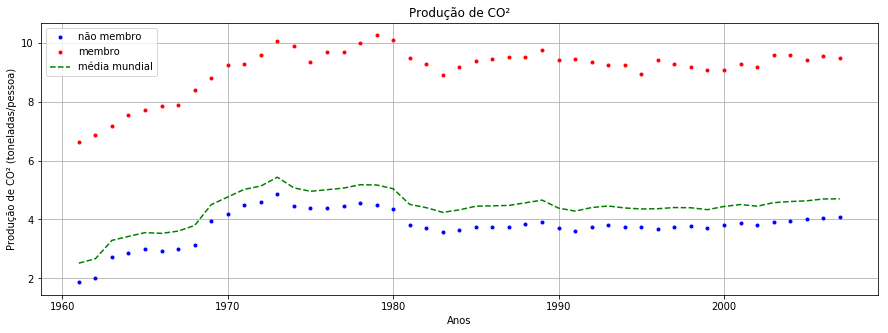

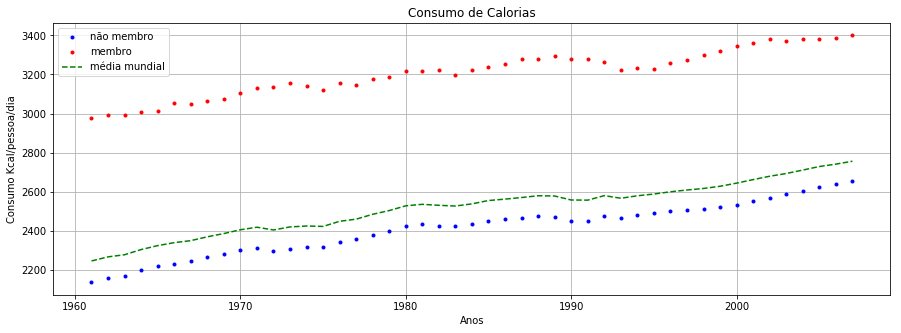

In [145]:
plt.figure(figsize=(15,5))
plt.plot(co2_out.mean(),'b.',label="não membro")
plt.plot(co2_in.mean(),'r.',label="membro")
plt.plot(co2.mean(),'g--',label='média mundial')
plt.legend()
plt.title("Produção de CO²")
plt.xlabel("Anos")
plt.ylabel("Produção de CO² (toneladas/pessoa)")
plt.grid(True)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(food_out.mean(),'b.',label="não membro")
plt.plot(food_in.mean(),'r.',label="membro")
plt.plot(food.mean(),'g--',label='média mundial')
plt.legend()
plt.title("Consumo de Calorias")
plt.xlabel("Anos")
plt.ylabel("Consumo Kcal/pessoa/dia")
plt.grid(True)
plt.show()

<b>8)</b> Unir as tabelas (com <i>join</i>) para fim de comparação entre os indicadores

In [24]:
new = {}
for year in years:
    new[year] = {}
    new[year]['all'] = pd.DataFrame(co2.loc[:,year]).join(food.loc[:,year], lsuffix="_co2", rsuffix="_food")
    new[year]['in'] = pd.DataFrame(co2_in.loc[:,year]).join(food_in.loc[:,year], lsuffix="_co2", rsuffix="_food")
    new[year]['out'] = pd.DataFrame(co2_out.loc[:,year]).join(food_out.loc[:,year], lsuffix="_co2", rsuffix="_food")

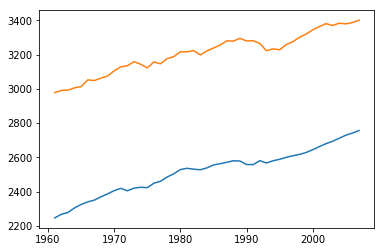

In [184]:
plt.plot(food.mean())
plt.plot(food_in.mean())
plt.show()

<ul>
<li>https://www.dw.com/pt-br/aumento-de-co2-na-atmosfera-compromete-qualidade-dos-alimentos/a-1754808</li> <br>
    <li>https://www.gapminder.org/data</li><br>
<li>http://worldpopulationreview.com/countries/oecd-countries</li><br>
</ul>